# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

100%|██████████| 62.0k/62.0k [00:00<00:00, 23.6MB/s]

Extracting files...


In [3]:
df_load = pd.read_csv(path + '/marketing_campaign.csv', sep='\t')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df_load

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_load.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
df_load.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


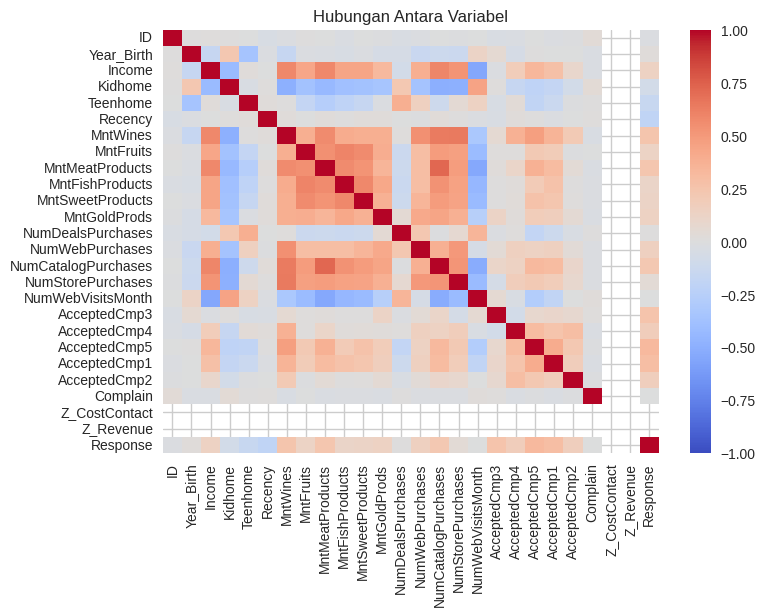

In [8]:
df_load_num = df_load.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_load_num.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hubungan Antara Variabel')
plt.show()

In [ ]:
for i, column in enumerate(df_load_num, 1):
    plt.figure(figsize=(15, 4))
    sns.histplot(df_load_num[column], kde=True)
    plt.title(column)

In [ ]:
df_load_cat = df_load.select_dtypes(include='object').filter(regex='^(?!.*(ID|Date)).*')

for i, column in enumerate(df_load_cat, 1):
    plt.figure(figsize=(15, 4))
    val = df_load_cat[column].value_counts().head(50)
    plt.bar(val.index, val)
    plt.xticks(rotation=90)
    plt.title(column)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
print(df_load.isnull().sum(), df_load.duplicated().sum())
df_load.info()
df_load.describe(include='all')

In [ ]:
df_load.dropna(inplace=True) # Drop saja karena data yang missing tidak terlalu banyak

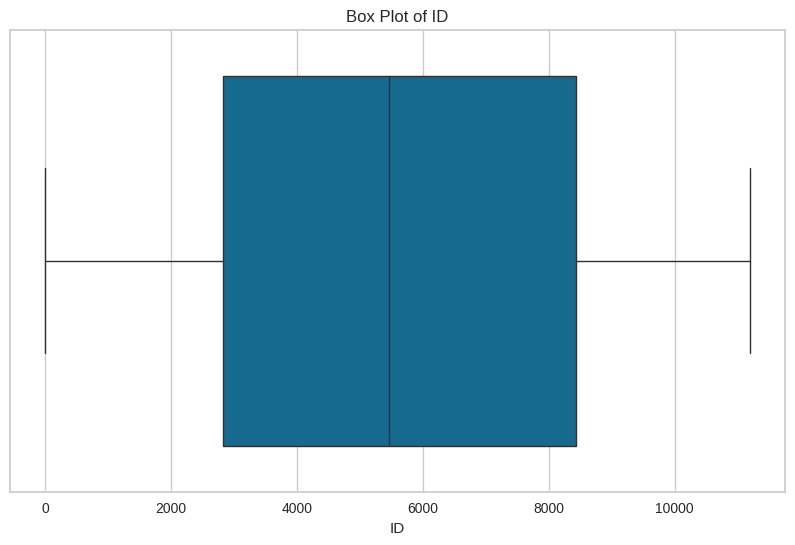

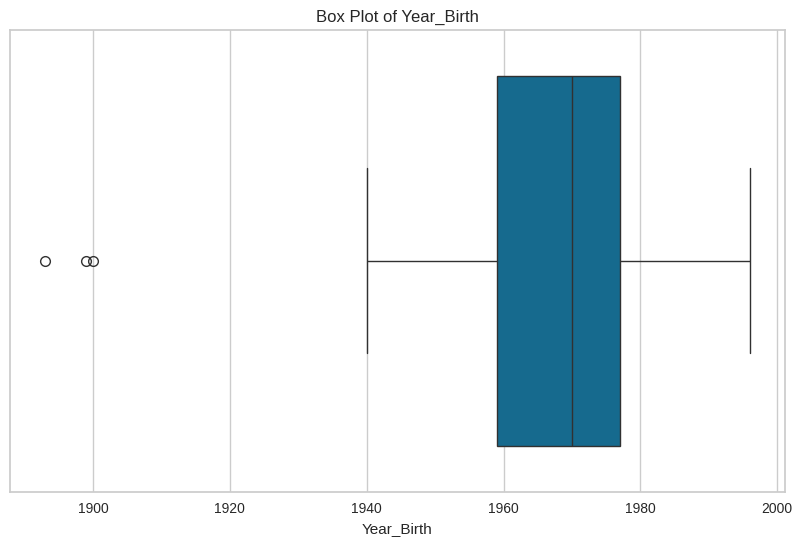

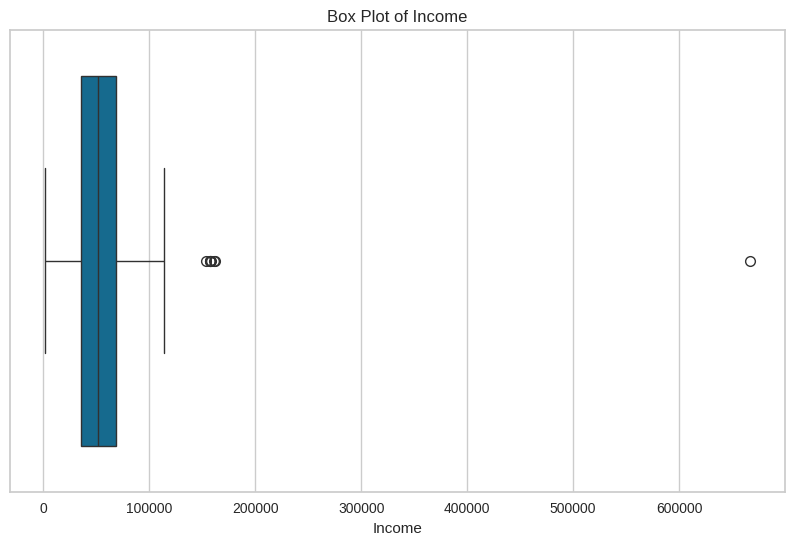

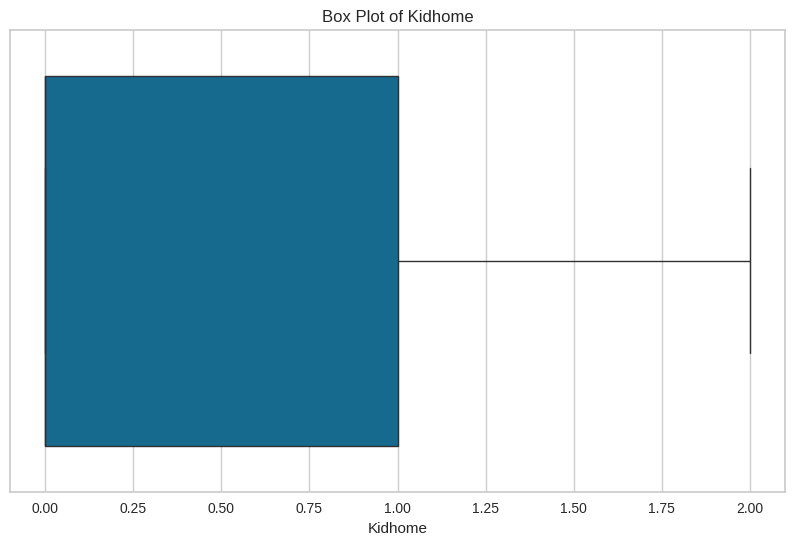

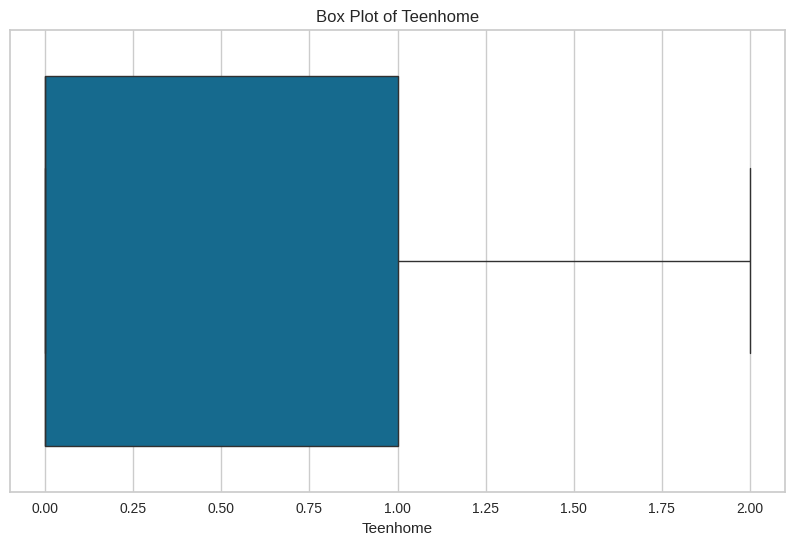

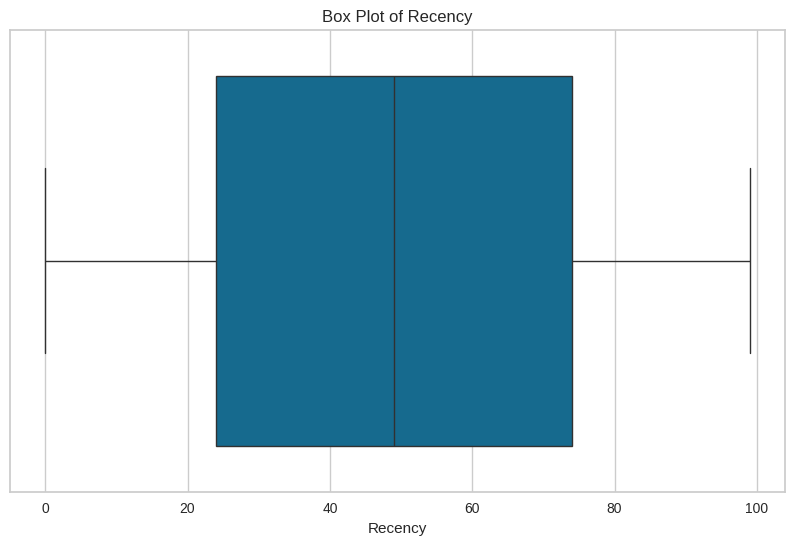

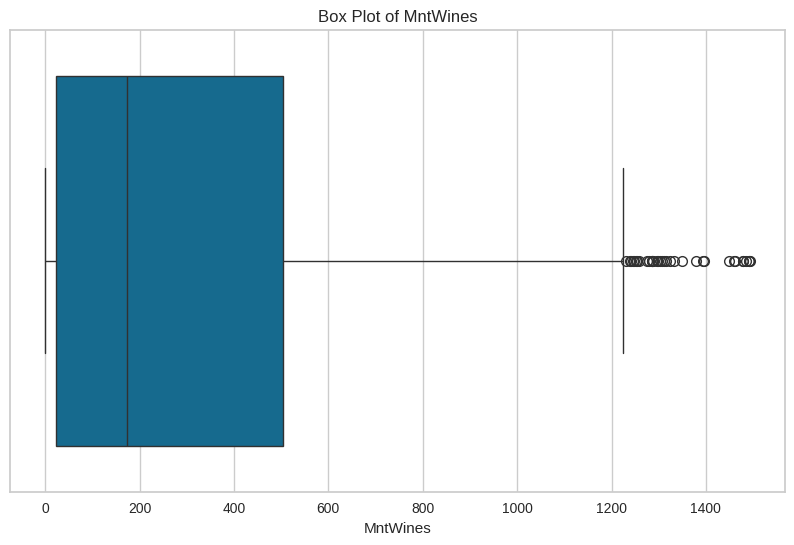

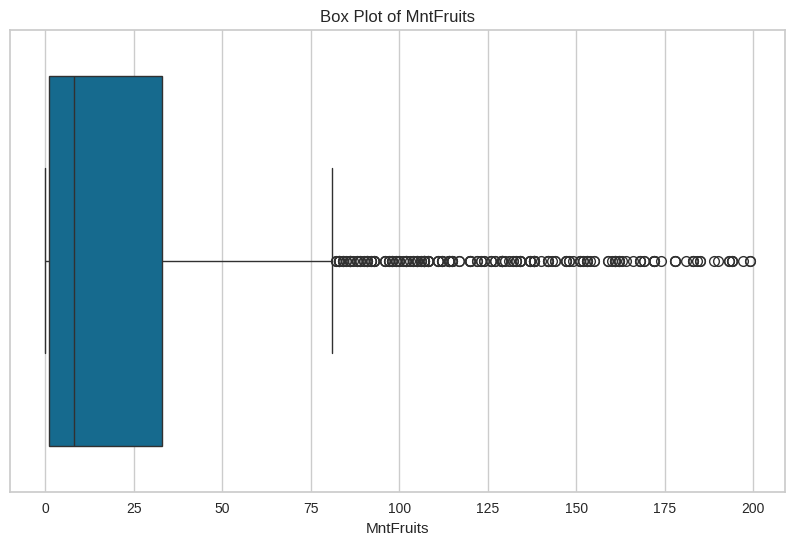

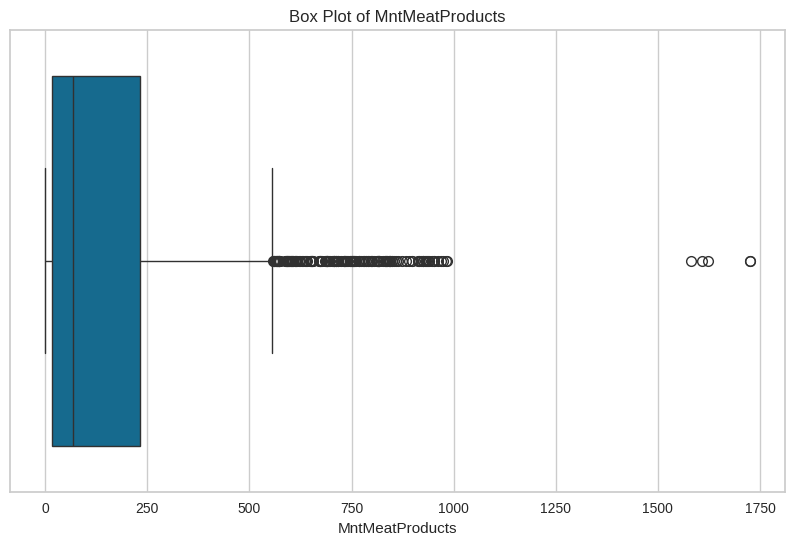

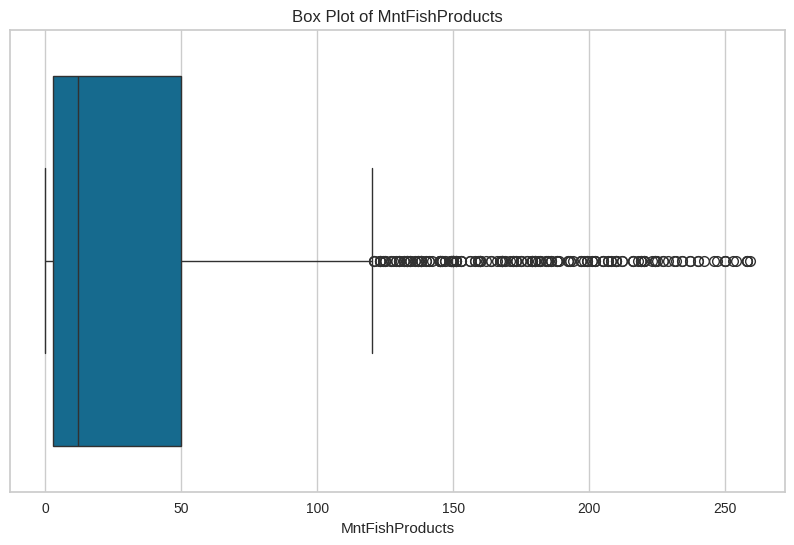

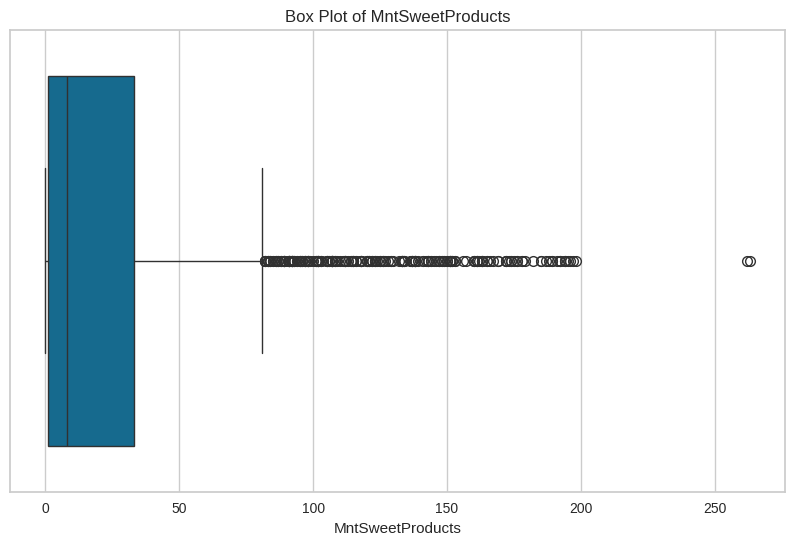

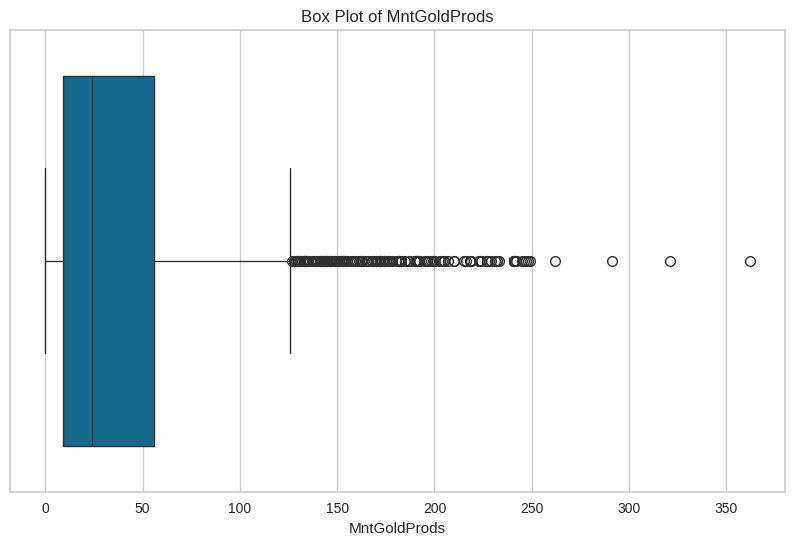

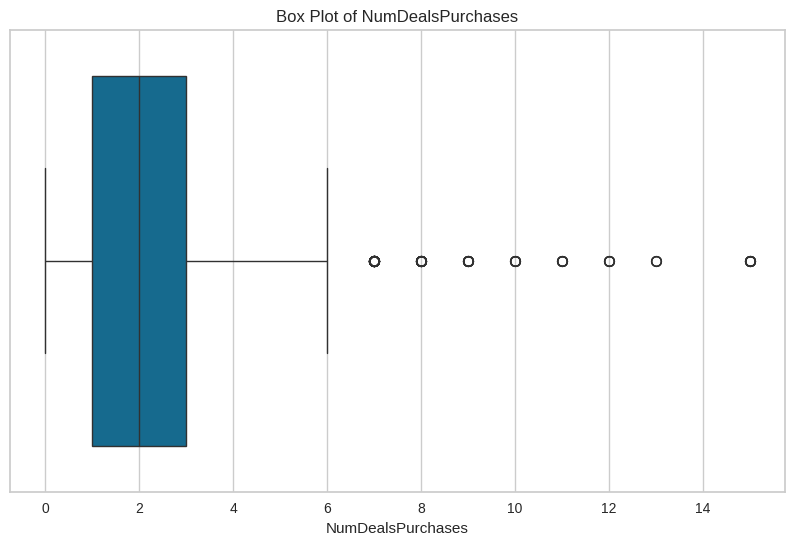

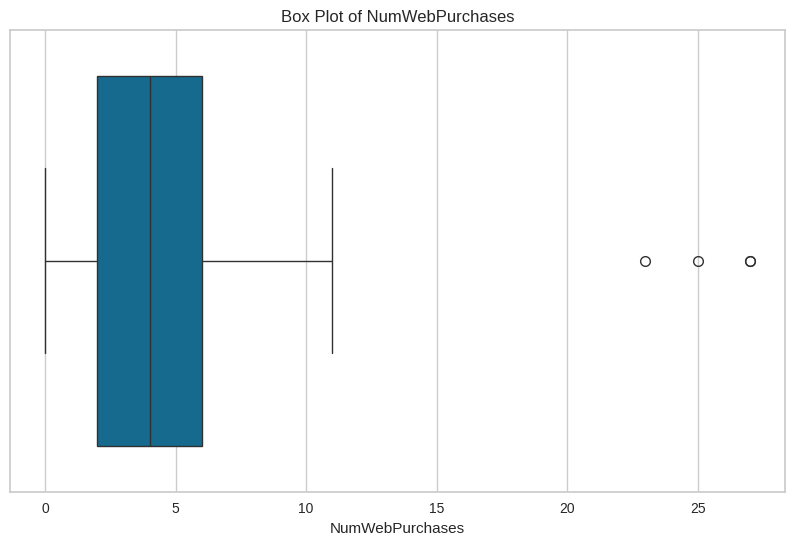

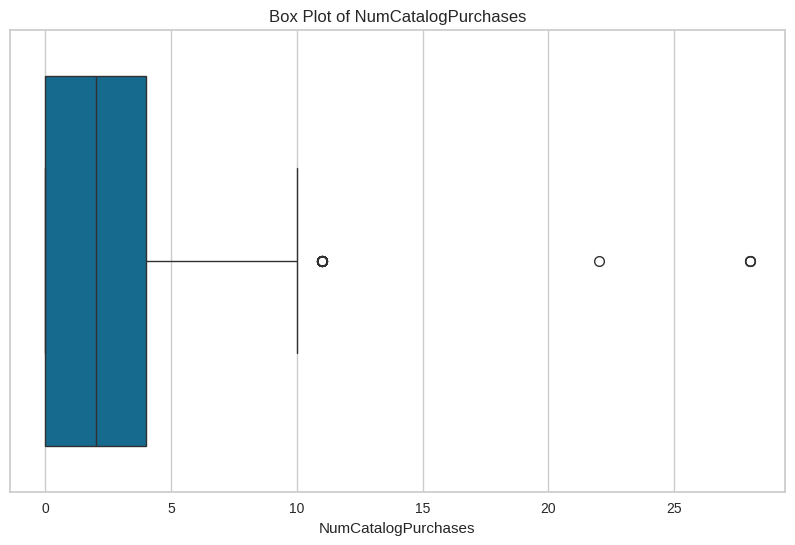

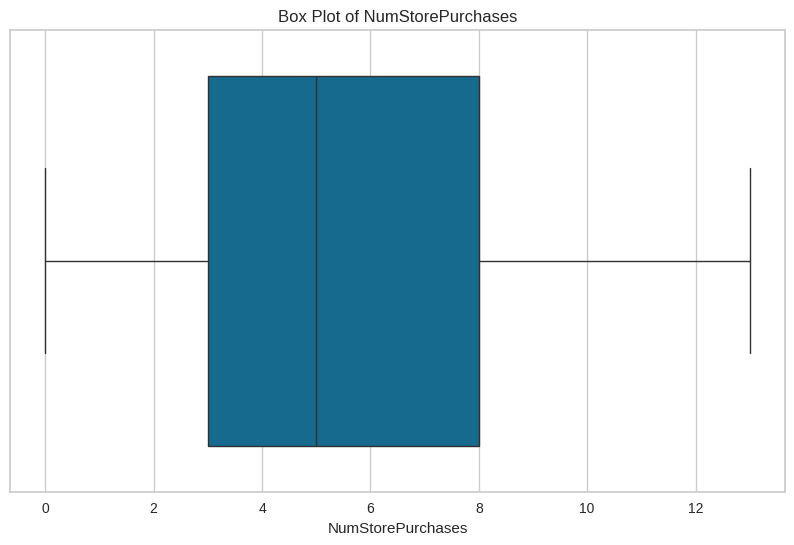

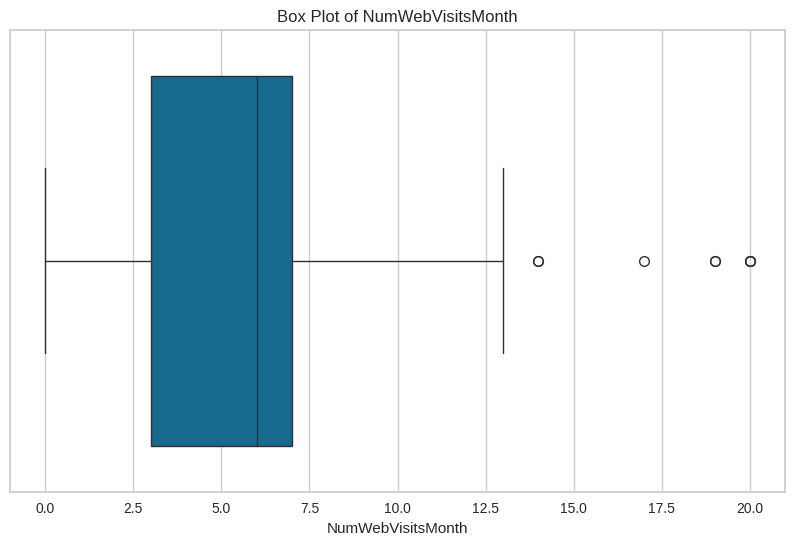

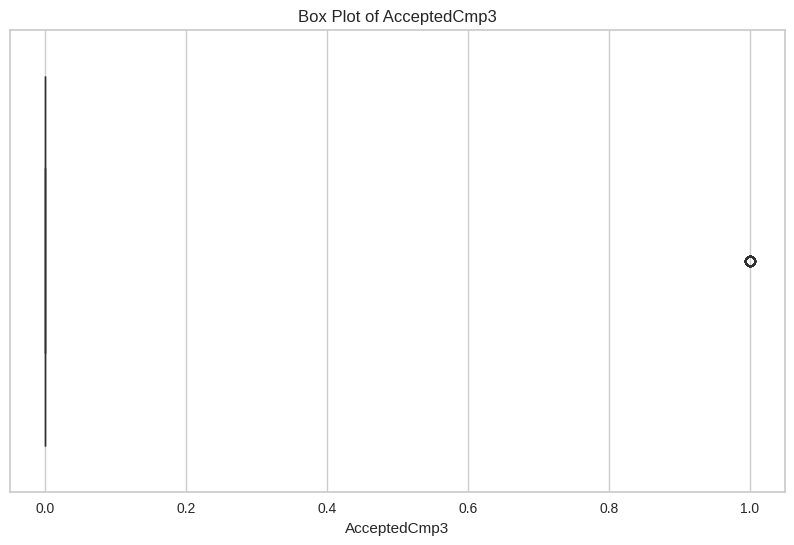

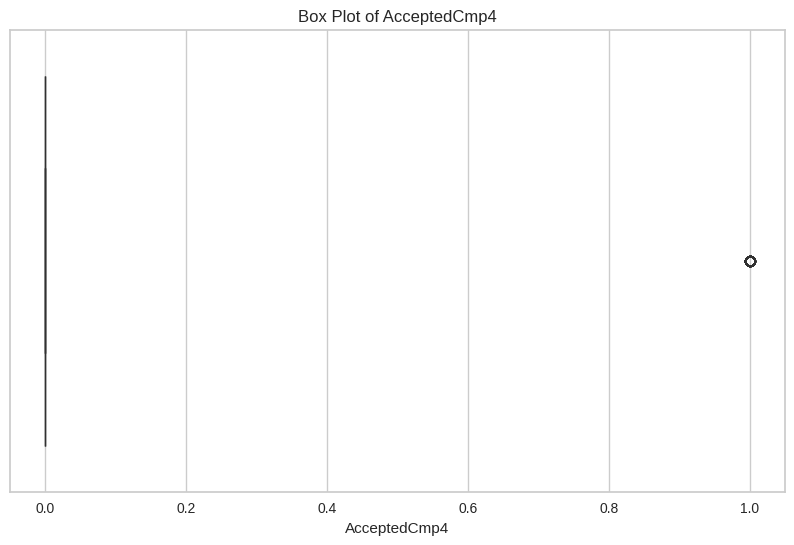

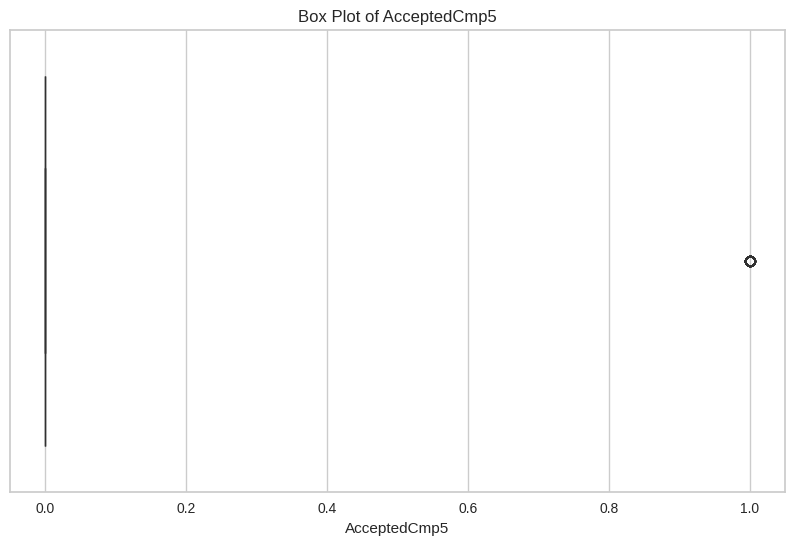

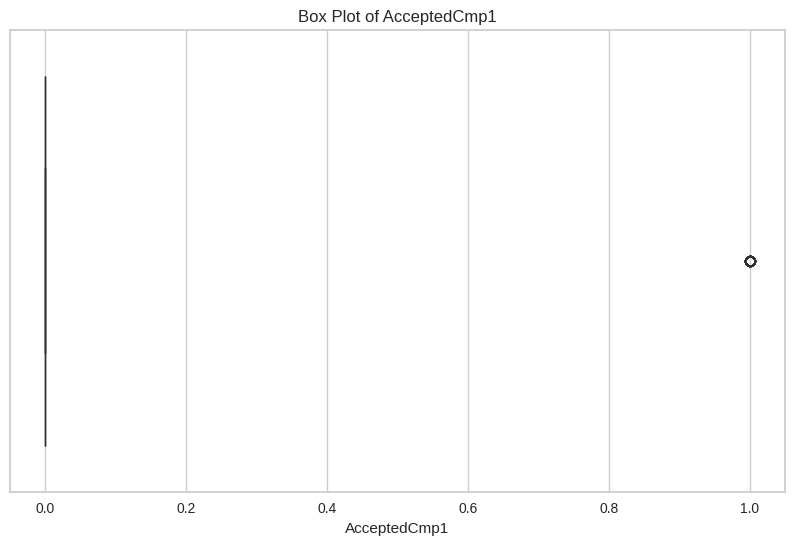

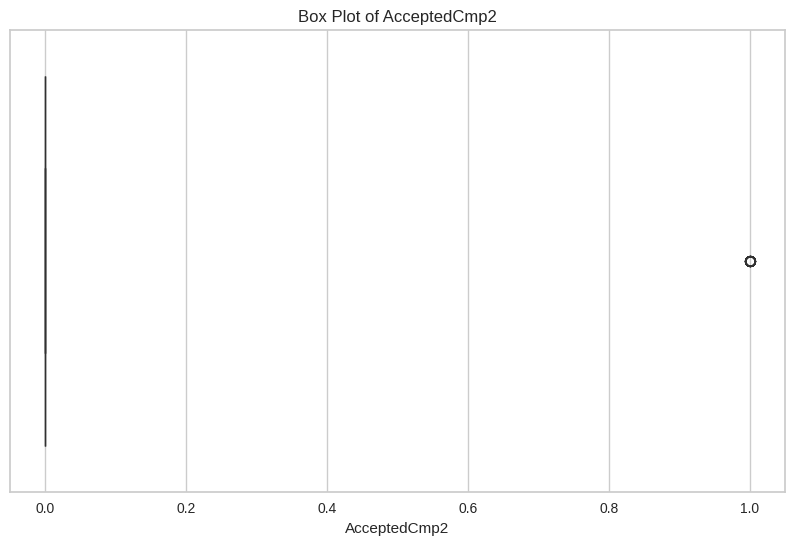

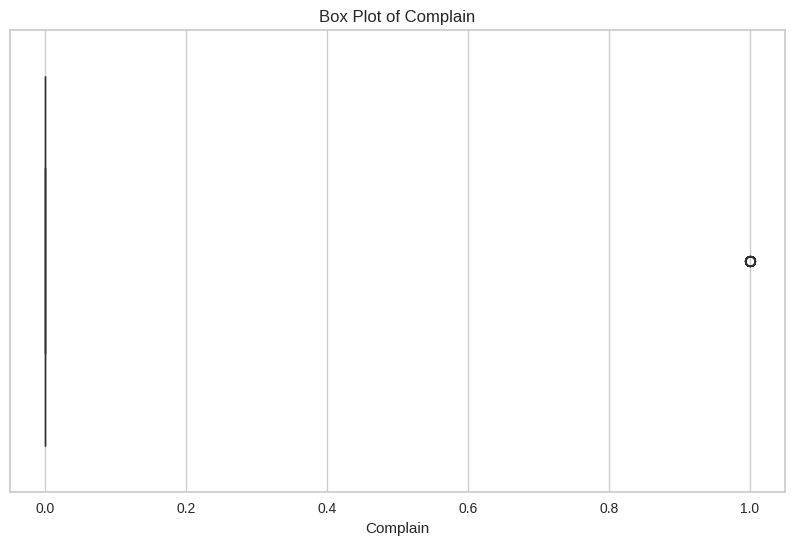

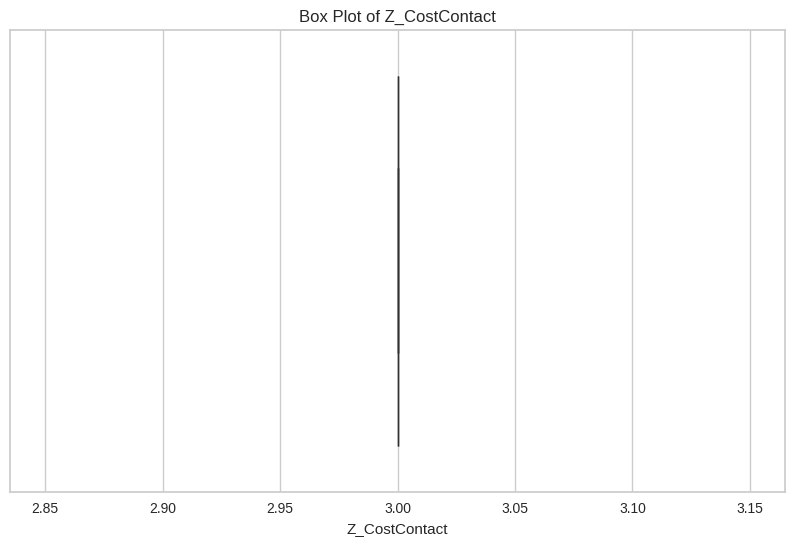

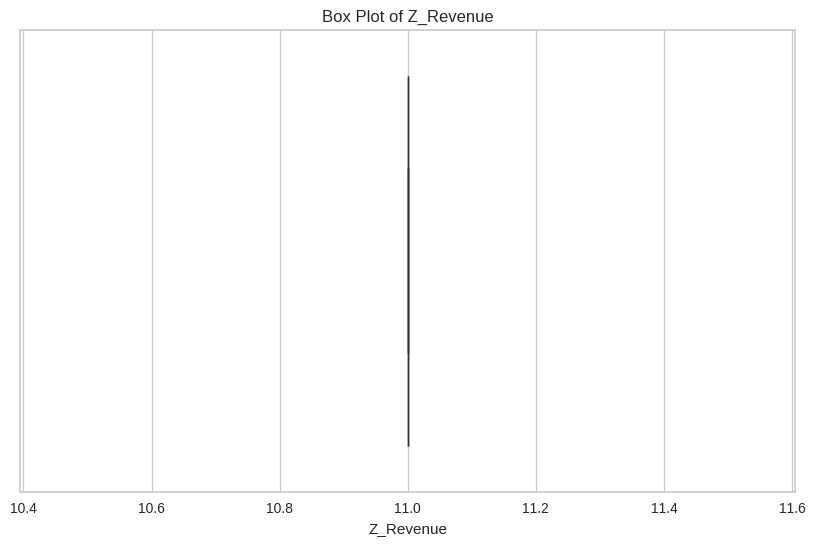

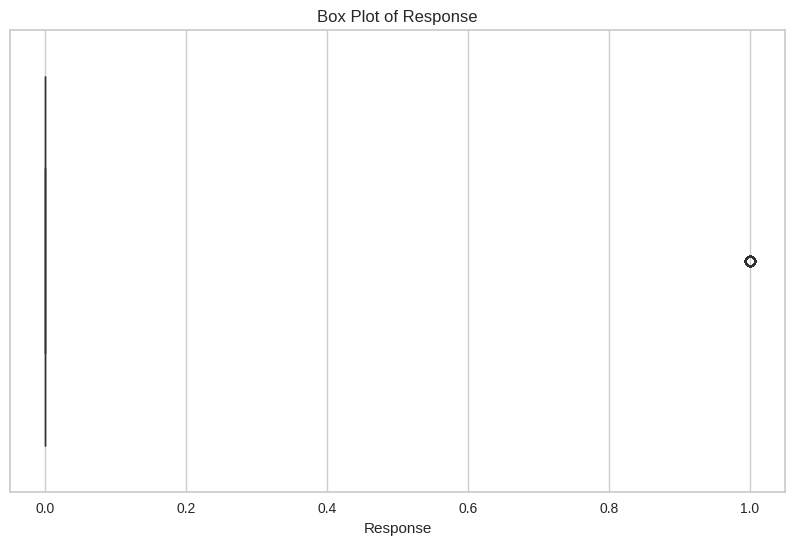

In [ ]:
for feature in df_load_num:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_load_num[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
for _, col in enumerate(df_load_num, 1):
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df_load_num[col].quantile(0.25)
    Q3 = df_load_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df_load_num[(df_load_num[col] < lower_bound) | (df_load_num[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    df_load_num = df_load_num.drop(outliers.index)

In [ ]:
print(df_load_num.isnull().sum(), df_load_num.duplicated().sum())
df_load_num.info()
df_load_num.describe(include='all')

ID                      0
Year_Birth              0
Income                 11
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64 0
<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 1 to 2234
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   839 non-null    int64  
 1   Year_Birth           839 non-null    int64  
 2   Inc

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,839.000000,839.000000,828.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0
mean,5612.867700,1970.954708,34824.251208,0.783075,0.493445,51.154946,41.282479,4.281287,21.052443,6.058403,...,6.343266,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
std,3251.767157,11.034675,12041.580055,0.508308,0.528105,28.777433,54.383528,6.218152,22.664611,7.468960,...,1.593221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.000000,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
25%,2803.000000,1963.000000,26091.000000,0.000000,0.000000,26.000000,8.000000,0.000000,7.000000,0.000000,...,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
50%,5454.000000,1972.000000,34421.000000,1.000000,0.000000,51.000000,21.000000,2.000000,14.000000,3.000000,...,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
75%,8409.500000,1978.500000,43027.500000,1.000000,1.000000,77.000000,51.000000,6.000000,25.000000,8.000000,...,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
max,11191.000000,1995.000000,69139.000000,2.000000,2.000000,99.000000,365.000000,51.000000,206.000000,47.000000,...,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [ ]:
df_load_num.dropna(inplace=True)

In [ ]:
df = df_load_num

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
silhouette_score(df, kmeans.labels_)

0.49578547000702117

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
df_load = pd.get_dummies(df_load, columns=['Education', 'Marital_Status']).drop(['ID', 'Dt_Customer'], axis=1)
df_load = df_load[:828]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df_load, kmeans.labels_)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.07  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{df_load.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = df_load.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = df_load[important_features]  # Hanya fitur penting dari data pelatihan

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Year_Birth: 0.07374522572894375
Income: 0.08716002739575036
Recency: 0.08215116460135596
MntWines: 0.08116699700648462
MntMeatProducts: 0.07801741415448123
MntGoldProds: 0.07102124684430004

Dimensi data pelatihan dengan fitur penting: (828, 6)


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,...,828.000000,828.0,828.0,828.0,828.0,828.0,828.0,828.0,828.0,828.0
mean,5608.080918,1970.996377,34824.251208,0.780193,0.492754,51.068841,41.347826,4.310386,21.073671,6.101449,...,6.339372,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
std,3252.251344,11.027447,12041.580055,0.508685,0.528460,28.763790,54.507710,6.250439,22.762814,7.488603,...,1.600195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.000000,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
25%,2781.250000,1963.000000,26091.000000,0.000000,0.000000,26.000000,8.000000,0.000000,7.000000,0.000000,...,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
50%,5454.500000,1972.000000,34421.000000,1.000000,0.000000,51.000000,20.500000,2.000000,14.000000,3.000000,...,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
75%,8391.500000,1978.250000,43027.500000,1.000000,1.000000,77.000000,51.000000,6.000000,25.000000,8.000000,...,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
max,11191.000000,1995.000000,69139.000000,2.000000,2.000000,99.000000,365.000000,51.000000,206.000000,47.000000,...,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [ ]:
# Memilih feature dengan pedoman:
# Drop Incomplete Features: fitur yang "incomplete" atau tidak lengkap mengacu pada kolom dalam dataset yang memiliki banyak missing values (nilai yang hilang). Fitur-fitur ini sering kali dianggap tidak informatif atau bahkan dapat merusak performa model machine learning jika tidak ditangani dengan benar. Meskipun menghapus fitur yang tidak lengkap bukanlah cara yang baik untuk menangani data yang hilang, hal ini acapkali menjadi pilihan tercepat. Selain itu, jika terlalu banyak data yang hilang, teknik ini masuk akal untuk dilakukan karena fitur-fitur seperti itu kemungkinan besar tidak penting.
# Drop Features with High Multicollinearity: multicollinearity adalah kondisi ketika dua atau lebih fitur dalam dataset sangat berkorelasi satu sama lain. Hal ini bisa menyebabkan masalah dalam model regresi atau model lain yang sensitif terhadap hubungan linear antara fitur seperti regresi linear atau logistik. Ketika fitur-fitur ini terlalu berkorelasi, mereka memberikan informasi yang redundan (berlebihan) sehingga dapat menyebabkan model menjadi tidak stabil atau sulit untuk diinterpretasikan.
# Drop Features with (Near-)Zero Variance: fitur dengan variansi yang sangat rendah atau mendekati nol merupakan fitur yang nilai-nilainya hampir tidak berubah di seluruh dataset. Dengan kata lain, fitur ini tidak memiliki banyak variasi dan tidak memberikan banyak informasi yang berguna untuk model.
# Variance Thresholding: fitur-fitur dengan variansi yang sangat rendah dapat diabaikan karena tidak memberikan banyak informasi baru.
# Principal Component Analysis (PCA): meskipun PCA secara teknis bukan metode seleksi fitur, ini sering digunakan untuk mengurangi dimensionalitas dengan mentransformasi fitur ke dalam komponen utama yang lebih sedikit. Namun, tetap merepresentasikan variasi terbesar dalam data.
# Clustering-based Methods: fitur-fitur yang secara bersama-sama membentuk kelompok (klaster) dalam data dapat dipilih sebagai fitur representatif berdasarkan clustering seperti k-means.
# Correlation-based Selection: fitur-fitur yang sangat berkorelasi satu sama lain dapat direduksi menjadi satu fitur untuk mengurangi redundansi.

df.drop(['AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'Complain', 'Response', 'Z_Revenue', 'Z_CostContact'], axis=1, inplace=True) # Near Zero Variance & Variance Thresholding
df.drop(['Teenhome', 'Kidhome'], axis=1, inplace=True) # Correlation-based Selection
df.drop(['ID', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth'], axis=1, inplace=True) # Tidak berguna dalam clustering menurut domain bisnis / nilai unik

df = df.sort_values(by=['Income'])
half = 85
df = df.iloc[:half]
df_augmented = df.copy()
df_augmented['Income'] = df_augmented['Income'] * 1.01
df = pd.concat([df, df_augmented], ignore_index=True)

akmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000)
akmeans.fit(df)
silhouette_score(df, akmeans.labels_) # 0.6931876398381589

0.6985280573634399

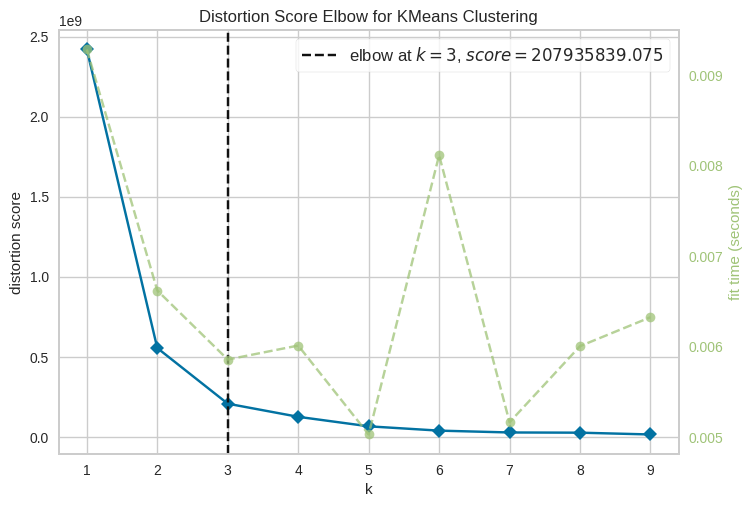

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
ekmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(ekmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
df['cluster'] = akmeans.labels_

# cluster_labels = {
#     -1: 'Penipuan',
#     0: 'Normal',
#     1: 'Mencurigakan'
# }

# df['cluster_label'] = df['cluster'].map(cluster_labels)

In [ ]:
df.describe()

,Year_Birth,Income,Recency,MntWines,MntMeatProducts,cluster
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1975.952941,15168.819706,51.352941,7.082353,10.552941,0.241176
std,11.282186,3783.526620,28.725473,7.093979,7.150960,0.429061
min,1946.000000,7500.000000,1.000000,0.000000,0.000000,0.000000
25%,1970.000000,13293.150000,27.000000,2.000000,5.000000,0.000000
50%,1978.000000,16307.925000,45.000000,5.000000,10.000000,0.000000
75%,1986.000000,18401.415000,77.000000,9.000000,15.000000,0.000000
max,1992.000000,19613.190000,98.000000,32.000000,38.000000,1.000000


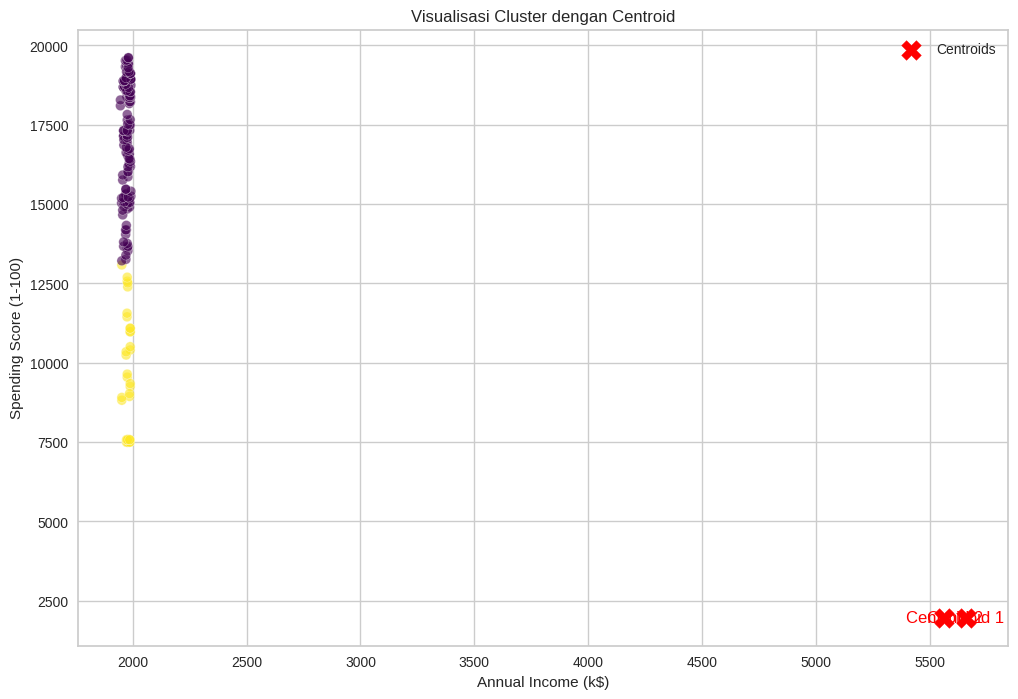

Nilai Centroids:
Centroid 1: Annual Income = 5658.27, Spending Score = 1967.66
Centroid 2: Annual Income = 5563.83, Spending Score = 1973.93


In [ ]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.